In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [2]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() # Load data

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
train_images = train_images.reshape((60000,28,28,1)) # BATCH SIZE, HEIGHT, WIDTH, CHANNELS
train_images = train_images.astype('float32')/255 # NORMALIZE DATA TO 0-1 RANGE (GREYSCALE)

test_images = test_images.reshape((10000,28,28,1))
test_images = test_images.astype('float32')/255

In [4]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels) # ONE-HOT ENCODE LABELS
test_labels = to_categorical(test_labels)

In [5]:
INPUT_SHAPE = (28,28,1) # HEIGHT, WIDTH, CHANNELS

In [14]:
# TEST METRICS:

model = Sequential()
model.add(Conv2D(32, (3,3), activation="relu", input_shape=INPUT_SHAPE))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dense(10,activation="softmax"))

# model.evaluate(test_images, test_labels)

In [18]:
model.compile(optimizer = "rmsprop", loss = "categorical_crossentropy", metrics = ["accuracy"])
model.fit(train_images, train_labels, batch_size = 64, epochs = 7)
#model.evaluate(test_)

#batch size = 64.

Epoch 1/7
938/938 [==============================] - 50s 53ms/step - loss: 0.0428 - accuracy: 0.9868
Epoch 2/7
938/938 [==============================] - 49s 52ms/step - loss: 0.0307 - accuracy: 0.9908
Epoch 3/7
938/938 [==============================] - 50s 53ms/step - loss: 0.0237 - accuracy: 0.9926
Epoch 4/7
938/938 [==============================] - 52s 56ms/step - loss: 0.0181 - accuracy: 0.9945
Epoch 5/7
938/938 [==============================] - 49s 52ms/step - loss: 0.0145 - accuracy: 0.9954
Epoch 6/7
938/938 [==============================] - 47s 50ms/step - loss: 0.0119 - accuracy: 0.9966
Epoch 7/7
938/938 [==============================] - 49s 52ms/step - loss: 0.0099 - accuracy: 0.9968


In [19]:

model.evaluate(test_images,test_labels)

313/313 [==============================] - 3s 9ms/step - loss: 0.0403 - accuracy: 0.9912


[0.04030456393957138, 0.9911999702453613]

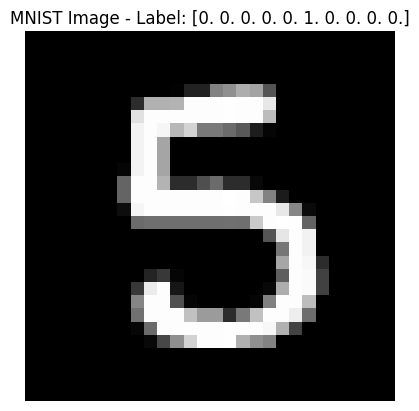

In [21]:
import matplotlib.pyplot as plt
import random

test_image_index = random.randrange(0, len(test_images))
plt.imshow(test_images[test_image_index], cmap='gray')  # Use 'gray' colormap for grayscale images
plt.title(f'MNIST Image - Label: {test_labels[test_image_index]}')
plt.axis('off')
plt.show()


In [23]:
print(f"Model Predicts that the number is a: {np.argmax(model.predict(test_images[test_image_index].reshape(1,28,28,1)))}")

1/1 [==============================] - 0s 22ms/step
Model Predicts that the number is a: 5
